In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_dir='D:\Python\Jigsaw\Python Models'

In [6]:
os.chdir(data_dir)

In [8]:
data=pd.read_csv("kc_housingdata.csv")

In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
## choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','sqft_living']]

In [17]:
data_num.dtypes

price          float64
bedrooms         int64
sqft_living      int64
dtype: object

In [19]:
## Scale the data using pandas
def scale(x) :
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

In [22]:
data_scaled.head()  ## data has been scaled using Z-means

,price,bedrooms,sqft_living
0,-0.866717,-0.398737,-0.979835
1,-0.005688,-0.398737,0.533634
2,-0.980849,-1.473959,-1.426254
3,0.174090,0.676485,-0.130550
4,-0.081958,-0.398737,-0.435422


In [24]:
## scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)
    

In [26]:
print (dat_scaled)
print("Type of output is "+str(type(dat_scaled)))
print("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -0.97983502]
 [-0.00568792 -0.39873715  0.53363434]
 [-0.98084935 -1.47395936 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.15404732]
 [-0.38158814 -0.39873715 -0.52252773]
 [-0.58588173 -1.47395936 -1.15404732]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (21613, 3)


In [28]:
## Create a cluster model
import sklearn.cluster as cluster

In [31]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
Kmeans=kmeans.fit(dat_scaled)

In [33]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
kmeans.cluster_centers_

array([[-0.39791853, -0.6664281 , -0.63391521],
       [ 0.09819018,  0.73875902,  0.48906294],
       [ 2.67708621,  0.95218306,  2.21946019]])

In [38]:
## Elbow method # cdist-find how far each row of the data is from all the clusters
# np.min-Find the minimum distance
# sum- Sum the minimum distance
# Wss.append--appended to the WSS to obtain Within Sum of Squares
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'),axis=1)) / dat_scaled.shape[0])

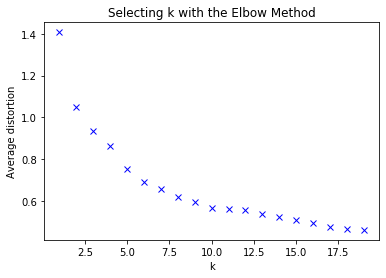

In [40]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [42]:
## Goodness of cluster fit using Silhouette measures--
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

In [44]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)

0.3788953766364496

In [ ]:
## in scikit the silhouette score method has a parameter to specify the number of observation
# to be randomly chosen for computing the silhouette score

In [46]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutee score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhoutee score for k= 7 is 0.37972848351594624
Silhoutee score for k= 8 is 0.3785472117793171
Silhoutee score for k= 9 is 0.363723996502909
Silhoutee score for k= 10 is 0.36772531807587666
Silhoutee score for k= 11 is 0.3484896294829248
Silhoutee score for k= 12 is 0.3369461171198498


In [48]:
## Will check silhouette score for 7-13 model
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.37972848351594624
Silhoutte score for k= 8 is 0.3785472117793171
Silhoutte score for k= 9 is 0.363723996502909
Silhoutte score for k= 10 is 0.36772531807587666
Silhoutte score for k= 11 is 0.3484896294829248
Silhoutte score for k= 12 is 0.3369461171198498


In [50]:
## Let's try to find the cluster profiles
import os
os.chdir("D:\Python\Jigsaw\Python Models\Codes")


In [52]:
import cluster_profiles as cluster_profiles

In [55]:
### Let's look for profiles for 8,9,10, clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)

In [57]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,sqft_living,Size
Labels,,,,
0,2.427940,0.846887,2.109539,959
1,-0.546717,-0.396569,-0.691158,5976
2,-0.315510,0.767104,-0.048733,4330
3,0.147147,-0.458877,0.113738,3450
4,0.284577,2.098903,1.002446,1220
5,-0.474747,-1.560516,-1.029747,2769
6,0.622086,0.500863,1.075159,2743
7,6.375292,1.239976,3.645489,166


In [58]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,sqft_living,Size
Labels,,,,
0,2.650402,1.233668,1.931529,959
1,0.628367,0.890581,0.694799,5976
2,0.785531,1.211655,0.978481,4330
3,1.100024,0.873390,1.050224,3450
4,1.193443,1.579116,1.442659,1220
5,0.677288,0.569432,0.545285,2769
6,1.422866,1.138195,1.474768,2743
7,5.333632,1.342127,2.609773,166
